# AutoEncoder
![image](https://user-images.githubusercontent.com/118172599/235408644-1560419c-cd08-4716-8e42-93cb5ab6b6ae.png)
- 인코더 : 일종의 특징추출기와 같은 역할
- 디코더 : 압축된 데이터를 다시 복원하는 역할
- 잠재변수(Latent Vector, Code) : 인코더로 압축된 코드
- 원본데이터와 인코더를 거친 데이터가 비슷하다면 잠재변수가 특징을 잘 추출했다고 할 수 있다

In [2]:
import tensorflow as tf
import numpy as np

## 데이터 준비

In [6]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.
test_X = test_X / 255.

(60000, 28, 28) (60000,)


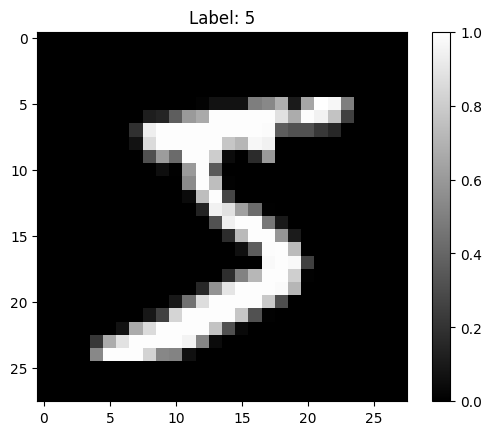

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.title("Label: " + str(train_Y[0]))
plt.show()

## 모델링

In [13]:
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)
print(train_X.shape, test_X.shape)

model = tf.keras.Sequential([
    # 인코더
    tf.keras.layers.Dense(784, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(64, activation="relu"),
    
    # 디코더
    tf.keras.layers.Dense(784, activation="sigmoid"),
])

model.compile(optimizer=tf.optimizers.Adam(), loss="mse")
model.summary()

(60000, 784) (10000, 784)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [14]:
# train_Y는 사용하지 않고 자신을 결과로 받는다
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 5s 14ms/step - loss: 0.0517
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0173
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0123
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0100
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0086
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0078
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0073
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0069
Epoch 9/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0065
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0063


## 모델평가

1/1 [==============================] - 0s 22ms/step


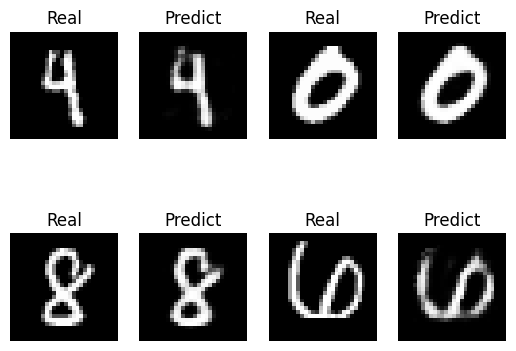

313/313 [==============================] - 1s 3ms/step - loss: 0.0060


0.005980048794299364

In [18]:
import random

for c in range(4):
    plt.subplot(2,4,c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.title("Real")
    plt.axis('off')
    
    plt.subplot(2,4,c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title("Predict")
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

## CNN활용

In [21]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(7*7*64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding="same", activation="relu"),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding="same", activation="sigmoid")
])

model.compile(optimizer=tf.optimizers.Adam(), loss="mse")
model.summary()

(60000, 28, 28, 1) (10000, 28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
 dense_6 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpos

In [22]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 12s 44ms/step - loss: 0.0737
Epoch 2/20
235/235 [==============================] - 10s 45ms/step - loss: 0.0302
Epoch 3/20
235/235 [==============================] - 11s 45ms/step - loss: 0.0226
Epoch 4/20
235/235 [==============================] - 11s 47ms/step - loss: 0.0205
Epoch 5/20
235/235 [==============================] - 10s 44ms/step - loss: 0.0196
Epoch 6/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0189
Epoch 7/20
235/235 [==============================] - 11s 48ms/step - loss: 0.0184
Epoch 8/20
235/235 [==============================] - 11s 47ms/step - loss: 0.0181
Epoch 9/20
235/235 [==============================] - 11s 47ms/step - loss: 0.0179
Epoch 10/20
235/235 [==============================] - 11s 48ms/step - loss: 0.0176
Epoch 11/20
235/235 [==============================] - 14s 59ms/step - loss: 0.0171
Epoch 12/20
235/235 [==============================] - 15s 62ms/step - loss: 0.0158
E

1/1 [==============================] - 0s 24ms/step


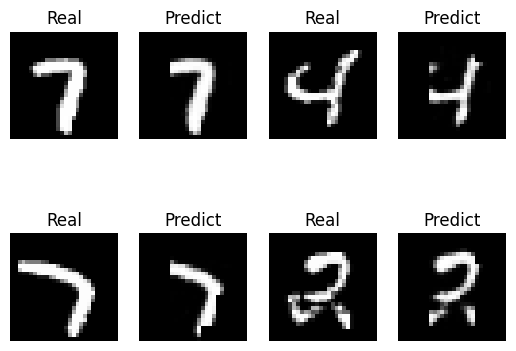

313/313 [==============================] - 2s 4ms/step - loss: 0.0147


0.014713313430547714

In [23]:
import random

for c in range(4):
    plt.subplot(2,4,c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.title("Real")
    plt.axis('off')
    
    plt.subplot(2,4,c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title("Predict")
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

## 활성함수 ELU 사용

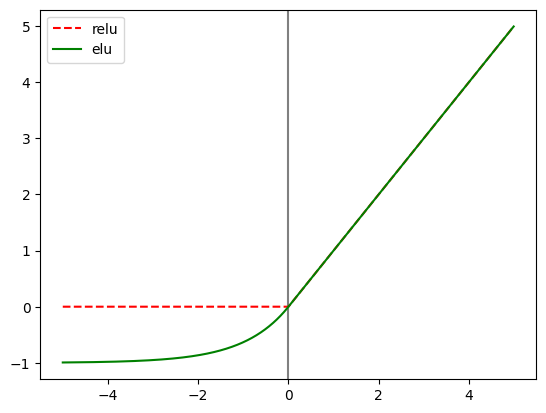

In [24]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [37]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

model = tf.keras.Sequential([
    # Encoder
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation="elu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation="elu"), # strides로 압축
    tf.keras.layers.Flatten(),
    # Latent_vector
    tf.keras.layers.Dense(64, activation="elu"),
    # Decoder
    tf.keras.layers.Dense(7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding="same", activation="elu"),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding="same", activation="sigmoid")
])

model.compile(optimizer=tf.optimizers.Adam(), loss="mse")
model.fit(train_X, train_X, epochs=20, batch_size=256)

(60000, 28, 28, 1) (10000, 28, 28, 1)
Epoch 1/20
235/235 [==============================] - 14s 54ms/step - loss: 0.0555
Epoch 2/20
235/235 [==============================] - 13s 54ms/step - loss: 0.0173
Epoch 3/20
235/235 [==============================] - 12s 49ms/step - loss: 0.0118
Epoch 4/20
235/235 [==============================] - 12s 53ms/step - loss: 0.0102
Epoch 5/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0094
Epoch 6/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0089
Epoch 7/20
235/235 [==============================] - 12s 53ms/step - loss: 0.0085
Epoch 8/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0082
Epoch 9/20
235/235 [==============================] - 12s 50ms/step - loss: 0.0080
Epoch 10/20
235/235 [==============================] - 17s 72ms/step - loss: 0.0077
Epoch 11/20
235/235 [==============================] - 14s 58ms/step - loss: 0.0075
Epoch 12/20
235/235 [==========================

1/1 [==============================] - 0s 22ms/step


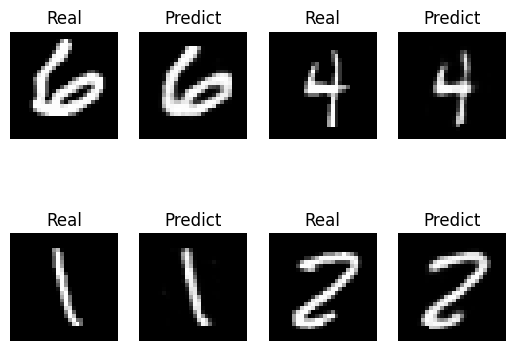

313/313 [==============================] - 2s 5ms/step - loss: 0.0061


0.006090817507356405

In [38]:
import random

for c in range(4):
    plt.subplot(2,4,c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.title("Real")
    plt.axis('off')
    
    plt.subplot(2,4,c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title("Predict")
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

## 잠재변수 벡터 확보

In [39]:
model.layers

In [40]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 5s 2ms/step
(60000, 64)
[-0.9999999  -0.99999994 15.750253    7.304641   -0.99999994 -0.99999315
 -0.99999994 19.439447   -0.99695975 20.283518   13.83636    15.591131
 16.641506   -0.99999624  4.6471577   7.8075852   7.9922457   4.42768
 -0.9995705  -0.99999994 12.733303   -0.6310043  12.974383    2.845164
 16.67444     8.550237   12.426606   -0.99999976 15.76346    10.026528
 21.415585   -0.99999994 -0.99999976  3.317292   20.409573   -0.99972624
 -0.9999996  10.980684    9.474409    4.8817163  -0.9999997  22.436485
  8.701533   19.306948   23.892899   12.66647     4.7384963   3.3779268
 -0.9999995  17.486814    5.8006535  -0.9999986  17.730646   21.00113
 -0.9999999  17.451616   16.485474   -0.99999994 -0.83593017 -0.9999997
  9.427272   -0.9999999   2.6820345  -0.9999997 ]


## 군집화

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=13)
kmeans.fit(latent_vector)

KMeans(n_clusters=10, n_init=10, random_state=13)

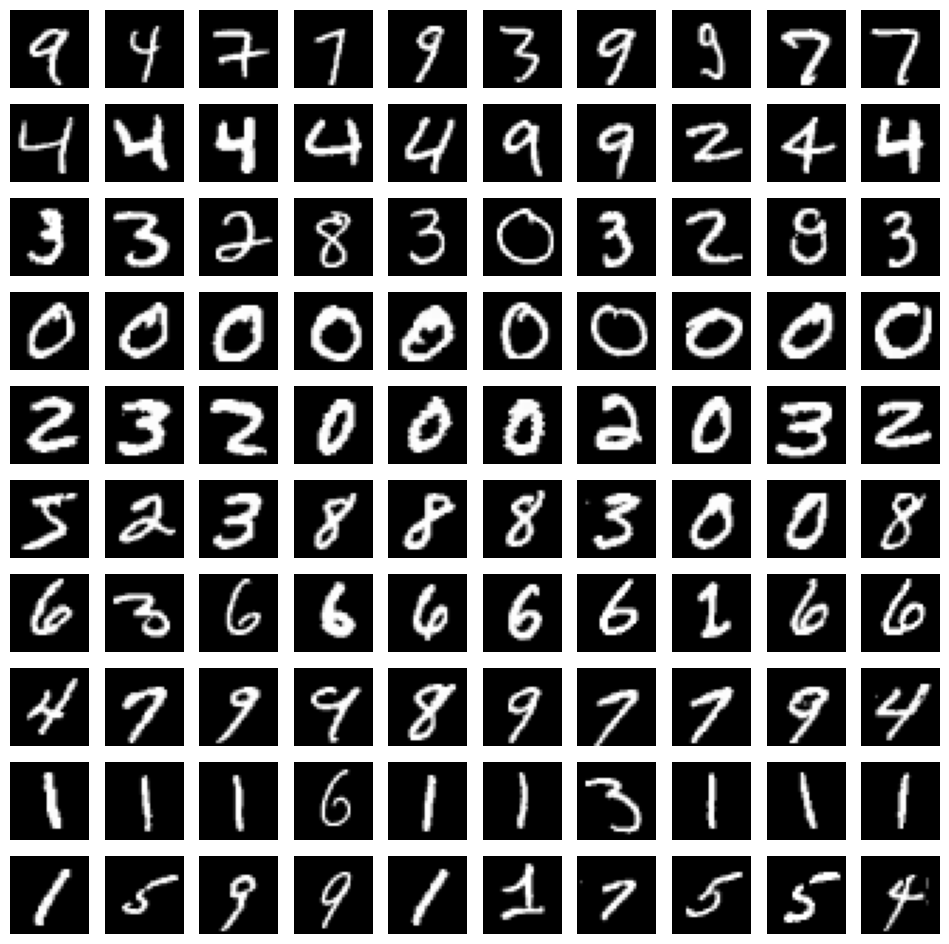

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28), cmap='gray')
        plt.axis("off")
plt.show()

# t-SNE
- t Stochastic Nearset Neighbor
- 고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법
- K-Means는 각 중심의 거리를 측정한다면
- t-SNE는 각 데이터의 유사도를 정의하고 원래공간에서 유사도가 비슷해지도록 학습시킴

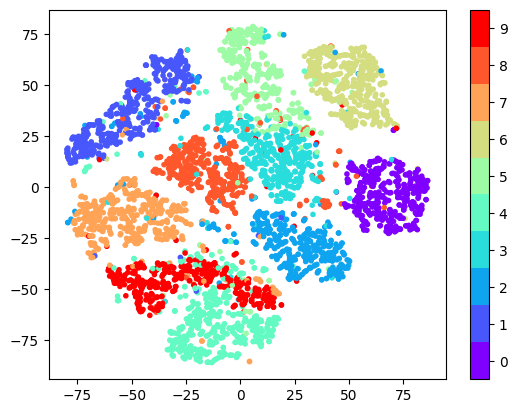

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap("rainbow", 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker=".", c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks = range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))
plt.show()

# Tensorflow에서 이미지증강

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [103]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    with_info=True,
    as_supervised=True,
)

## 데이터 확인

In [104]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


In [105]:
get_label_name = metadata.features['label'].int2str
[get_label_name(n) for n in range(5)]

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

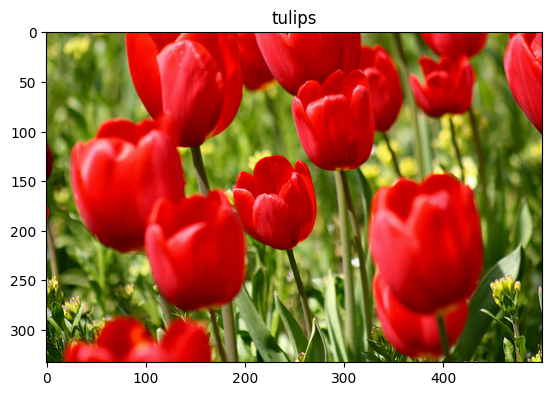

In [106]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_=plt.imshow(image)
_=plt.title(get_label_name(label))

## 크기와 비율

Min and Max pixel values: 0.0 1.0


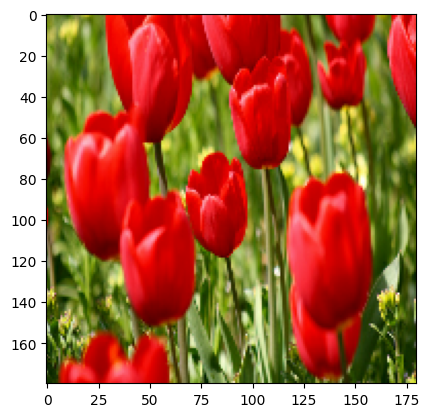

In [107]:
IMG_SIZE = 180

resize_and_recale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

image = resize_and_recale(image)
_=plt.imshow(image)
print("Min and Max pixel values:", image.numpy().min(), image.numpy().max())

## 데이터 회전과 증강

In [108]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [109]:
# tf.extend_dims
print("tf.expand_dims 적용 전")
image.shape

tf.expand_dims 적용 전


TensorShape([180, 180, 3])

In [110]:
print("tf.expand_dims 적용 후")
image = tf.expand_dims(image, 0)
image.shape

tf.expand_dims 적용 후


TensorShape([1, 180, 180, 3])

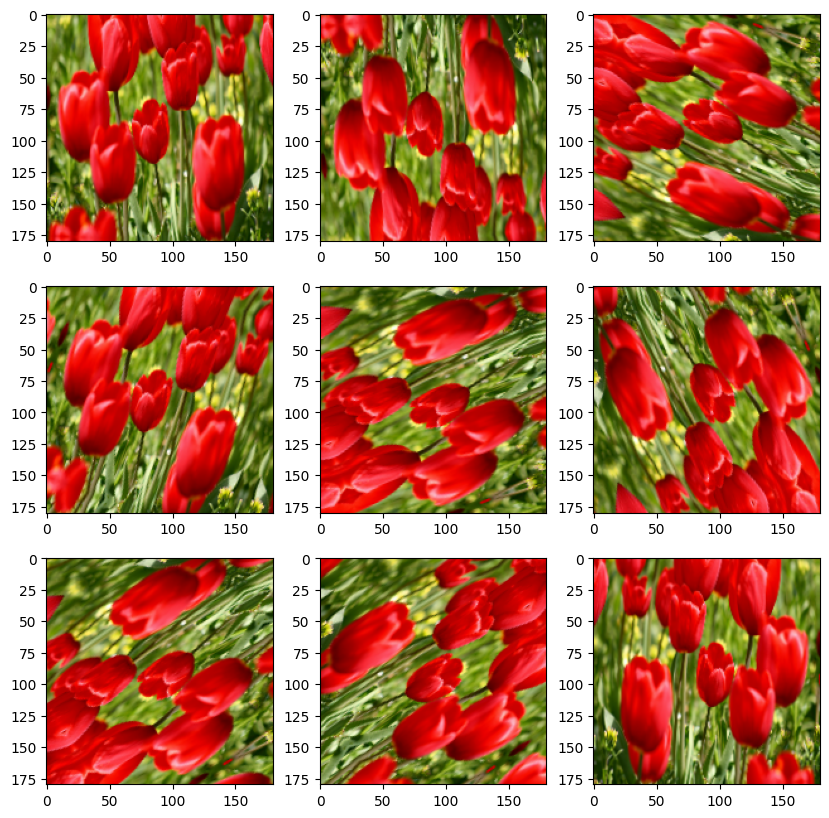

In [111]:
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0])
    plt.axis()

In [112]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(121)
    plt.title("Original")
    plt.imshow(original)
    
    plt.subplot(122)
    plt.title("Augmented")
    plt.imshow(augmented)

## 뒤집기

In [113]:
image = tf.squeeze(image)

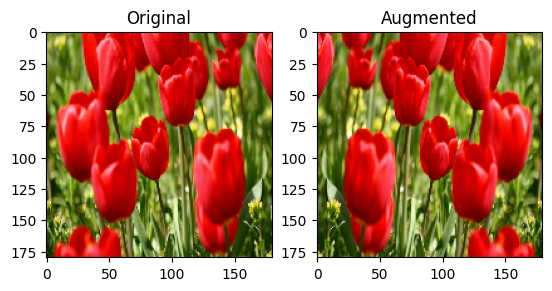

In [114]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

## 그레이 스케일

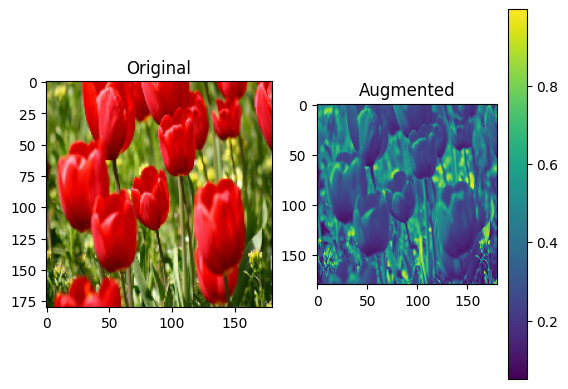

In [115]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_=plt.colorbar()

## 채도변화

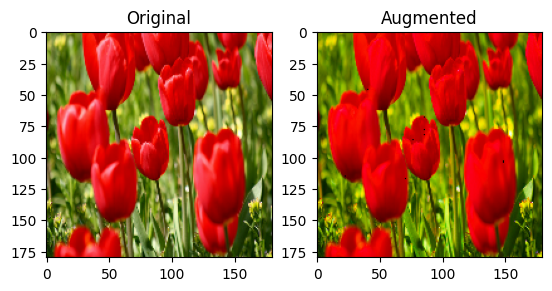

In [116]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

## 밝기변화

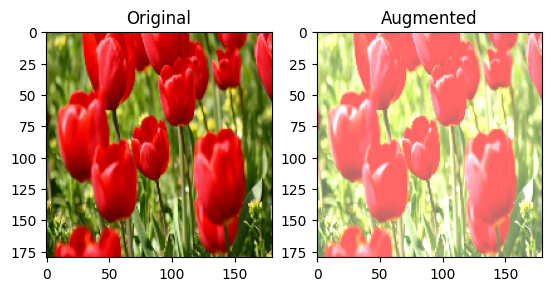

In [117]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

## 이미지자르기

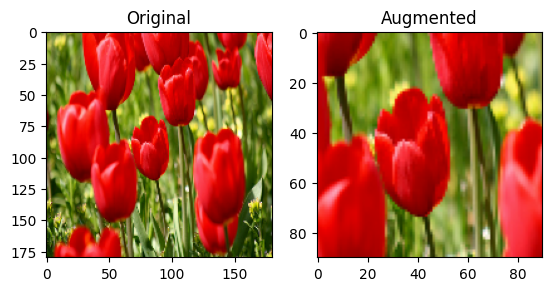

In [118]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

## 90도 회전

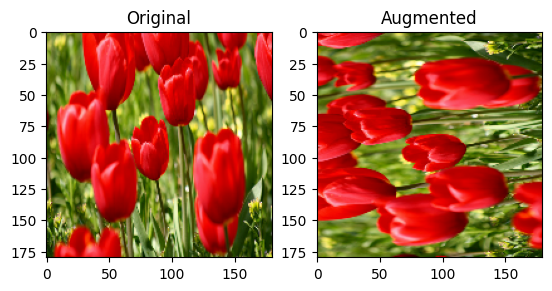

In [119]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

## 증강코드 함수화

In [120]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    with_info=True,
    as_supervised=True,
)

In [121]:
def resize_and_recale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image/255.)
    return image, label

def augment(image, label):
    image, label = resize_and_recale(image, label)
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
    image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [122]:
batch_size=32
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds.shuffle(1000).map(augment, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)
)
val_ds = (
    val_ds.shuffle(1000).map(augment, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)
)
test_ds = (
    test_ds.shuffle(1000).map(augment, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)
)
